In [2]:
from idlelib.colorizer import color_config

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
# load the meta data
metadata_df = pd.read_csv('metadata.csv')
title_embeddings = np.load("metadata_title_embeddings.npz")["embeddings"]
keyword_embeddings = np.load("metadata_keywords_embeddings.npz")["embeddings"]
print(f"Shape of title embeddings: {title_embeddings.shape}")
print(f"Shape of keyword embeddings: {keyword_embeddings.shape}")

Shape of title embeddings: (9026, 1024)
Shape of keyword embeddings: (9026, 1024)


In [4]:
# load the annotations
annotations_df = pd.read_csv('annotations.csv')
annotations_embeddings = np.load("annotations_text_embeddings.npz")["embeddings"]
annotations_df.head(n=3)
print(f"Shape of annotations embeddings: {annotations_embeddings.shape}")

Shape of annotations embeddings: (35826, 1024)


In [5]:
# Load audio features
feature_filename = metadata_df.loc[0, "filename"].replace("mp3", "npz")
features = np.load(os.path.join("audio_features", feature_filename))
# print(list(features.keys())) # keys: ['embeddings', 'melspectrogram', 'mfcc', 'mfcc_delta', 'mfcc_delta2', 'flatness', 'centroid', 'flux', 'energy', 'power', 'bandwidth', 'contrast', 'zerocrossingrate']
print(f"Shape of audio features: {features['embeddings'].shape}")

print("Shape of ZCR feature (time, n_features)", features["zerocrossingrate"].shape)
print("Shape of MFCC features (time, n_features)", features["mfcc"].shape)

Shape of audio features: (233, 768)
Shape of ZCR feature (time, n_features) (233, 1)
Shape of MFCC features (time, n_features) (233, 32)


# Task 1
 Find two interesting recordings with at least two annotators and multiple annotations. Compare the temporal and textual annotations, and try to answer the following questions: </br>
(a) Identify similarities or differences between temporal and textual annotations from different annotators. </br>
(b) To what extent do the annotations rely on or deviate from keywords and textual descriptions in the
audio’s metadata? </br>
(c) Was the temporal and text annotations done according to the task description? </br>






In [6]:
# Find recordings with two or more annotators
annotations_df = pd.read_csv('annotations.csv')

# copy to work on
annotations_df_copy = annotations_df.copy()

# Find rows where file is the same, but different annotators
# First group by filename and count unique annotators
filename_multi_annot = annotations_df_copy.groupby("filename")["annotator"].nunique()
filename_multi_annot = filename_multi_annot[filename_multi_annot >= 2]

# then we filter initial dataframe
filtered_only_multi = annotations_df_copy[annotations_df_copy["filename"].isin(filename_multi_annot.index)]

# We can also filter for just one file, first file with index 0
filtered_only_multi_single = annotations_df_copy[annotations_df_copy["filename"] == filename_multi_annot.index[0]]

filtered_only_multi_single

,task_id,filename,annotator,text,onset,offset,filename_unsafe
7568,161982937,102431.mp3,7505829110384075687331616965056441784304296723...,Baby making mid-pitched unrhythmic non-crying ...,19.648504,23.590653,102431_mild_cryingaif.mp3
12072,161982937,102431.mp3,7505829110384075687331616965056441784304296723...,Baby making mid-pitched non-crying vocal noises,3.423446,5.705743,102431_mild_cryingaif.mp3
15463,161982937,102431.mp3,2825101440002704998553785231562509406931203443...,"Baby crying, repeatedly, natural, indoors, nea...",0.011457,26.225669,102431_mild_cryingaif.mp3
16641,161982937,102431.mp3,7505829110384075687331616965056441784304296723...,Mid-frequency loud constant baby cry,17.324710,18.735585,102431_mild_cryingaif.mp3
17965,161982937,102431.mp3,7505829110384075687331616965056441784304296723...,Mid-frequency loud constant baby cry,6.016965,8.278514,102431_mild_cryingaif.mp3
18846,161982937,102431.mp3,7505829110384075687331616965056441784304296723...,Mid-frequency loud constant baby cry,23.818883,26.018187,102431_mild_cryingaif.mp3
19487,161982937,102431.mp3,7505829110384075687331616965056441784304296723...,Mid-frequency loud constant baby cry,12.552634,14.917924,102431_mild_cryingaif.mp3
26839,161982937,102431.mp3,7505829110384075687331616965056441784304296723...,Baby making mid-pitched unrhythmic non-crying ...,15.374383,17.075732,102431_mild_cryingaif.mp3
34720,161982937,102431.mp3,7505829110384075687331616965056441784304296723...,Baby making mid-pitched unrhythmic non-crying ...,8.506744,12.324405,102431_mild_cryingaif.mp3
34790,161982937,102431.mp3,7505829110384075687331616965056441784304296723...,"Mid-frequency baby crying sound with short, un...",0.000000,2.821749,102431_mild_cryingaif.mp3


# Task 2
## Annotation Quality (6 points): Use the audio recordings annotated by multiple annotators to answer
the following questions: </br>
(a) How precise are the temporal annotations?</br>
(b) How similar are the text annotations that correspond to the same region?</br>
## Use the complete data set (or a subset) to address the following points quantitatively. </br>
(a) How many annotations did we collect per file? How many distinct sound events per file?</br>
(b) How detailed are the text annotations? How much does the quality of annotations vary between</br>
different annotators? </br>
(c) Are there any obvious inconsistencies, outliers, or poor-quality annotations in the data? Propose a
simple method to filter or fix incorrect or poor-quality annotations (e.g., remove outliers, typos, or
spelling errors).



In [7]:
# We can use filtered_only_multi dataframe for this
# It has the one with the same file name, but different annotators (people annotating)
print(f"{filtered_only_multi.head(n=10)}")

      task_id    filename                                          annotator  \
7   161983960  141704.mp3  7987031631534961530232794186036602699680134081...   
11  161985829   56696.mp3  1688441243399859095829520104641879070247532203...   
13  161977997  690473.mp3  4286746933245921598409018197449130956478496797...   
29  161977946  656432.mp3  5207187169307484054122280736417664446933095656...   
33  161986483  114286.mp3  8960534646813062318784592632173589349806817458...   
39  161980218  232200.mp3  6456122602099489630181875092277063084996133712...   
53  161978723  620543.mp3  5886409296465261467199666846084514319971216124...   
65  161982010  659002.mp3  7876820061793124971875651913290083500918156556...   
74  161987675  560530.mp3  7171497719345575245730830397493324466737689432...   
80  161984202  700522.mp3  5512148246550667922460582580350646988130624814...   

                                                 text      onset     offset  \
7                    crowd of people how

# How precise are temporal annotations?
# How similar are the text annotations that correspond to the same region?

Answer here

# Task 3 (This is what we need to present)
## Audio Features (6 points): Load and analyze the audio features:</br>
(a) Which audio features appear useful? Select only the most relevant ones or perform a down projection
for the next steps. </br>
(b) Extract a fixed-length feature vector for each annotated region as well as for all the silent parts in
between. The most straightforward way to do this is to average the audio features of the corresponding
region over time, as shown in the tutorial session.</br>
(c) Cluster the audio features for the extracted regions. Can you identify meaningful clusters of audio
features? Do the feature vectors of the silent regions predominantly fall into one large cluster?


In [8]:
import numpy as np

audio_features = {}

# make sure filename is the new index for metadata_df
metadata_df = metadata_df.set_index("filename")

for idx, row in metadata_df.iterrows():
    file_name = idx.replace("mp3", "npz")
    path_features = os.path.join("audio_features", file_name)

    features = np.load(path_features)["embeddings"]
    audio_features[idx] = features

print("Number of feature files: ", len(audio_features))

Number of feature files:  9026


In [9]:
# getting first feature tensor
feature_tensor = audio_features[metadata_df.index[0]]
print(f"Shape of feature tensor: {feature_tensor.shape}")
print("Time steps: \t\t", len(feature_tensor))
print("Feature vector size: \t", feature_tensor.shape[1])

Shape of feature tensor: (233, 768)
Time steps: 		 233
Feature vector size: 	 768


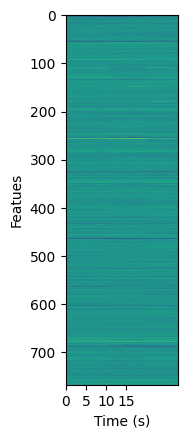

In [10]:
# Basic plotting
plt.imshow(feature_tensor.T)
plt.xlabel("Time (s)")
plt.ylabel("Featues")
plt.xticks(np.arange(0,20,5)/0.12, np.arange(0,20,5))
plt.show()

In [11]:
# firse we compute mean and standard deviation
from sklearn import preprocessing

concatenated_feature_tensor = np.concatenate(list(audio_features.values()), axis=0)

scaler = preprocessing.StandardScaler().fit(concatenated_feature_tensor)

del concatenated_feature_tensor

# MERGING TABLES
annotations_merged = annotations_df.merge(metadata_df, on="filename", how="left", suffixes=("", "_metadata"))


# Extraction audio features for each annotated region
import math
def get_features_of_annotation(
        onset: float,
        offset: float,
        audio_features: np.ndarray,
        scaler: preprocessing.StandardScaler = None
) -> np.ndarray:

    RESOLUTION = 0.12 # temporal resolution of the features is 120 ms
    start_idx = math.floor(onset / RESOLUTION)
    offset_idx = math.ceil(offset / RESOLUTION)

    audio_features = audio_features[start_idx:offset_idx]
    if scaler is not None:
        audio_features = scaler.transform(audio_features)
    return audio_features.mean(axis=0)

# compute on 768-dimensinoal vector for each annotated region

X = np.zeros((len(annotations_merged), 768))
for i, row in annotations_merged.iterrows():
    X[i] = get_features_of_annotation(row["onset"], row["offset"], audio_features[row["filename"]], scaler)

print("Audio Features of annotated regions:", X.shape)

Audio Features of annotated regions: (35826, 768)


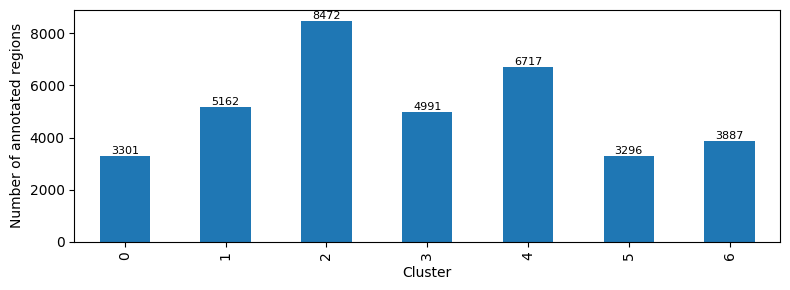

In [12]:
# Clustering
from sklearn.cluster import KMeans

# Change the amount of clusters
n_clusters = 7

# Choosing the number of clusters here is super important
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X) # max_iter default is 300
clusters_assignment = kmeans.predict(X)
annotations_merged["cluster"] = clusters_assignment
annotations_merged["cluster"].head(n=n_clusters)

# plotting these clusters
counts = annotations_merged["cluster"].value_counts(sort=False).sort_index()
counts.plot(kind="bar", figsize=(8, 3))
# adding count to each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha="center", va="bottom", fontsize=8)

plt.xlabel("Cluster")
plt.ylabel("Number of annotated regions")
plt.tight_layout()
plt.savefig("clusters_of_regions.png", dpi=300)
plt.show()


NOW WE NEED TO FIGURE OUT WHAT EACH CLUSTER IS AND IF ANY CORRESPOND TO SILENCE WITHIN THE AUDIO FILES



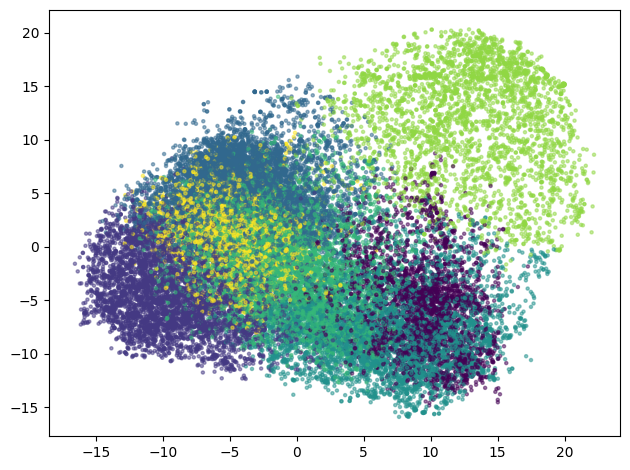

In [13]:
# Visualizing clusters using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_assignment, s=5, alpha=0.5)
plt.tight_layout()
plt.savefig("pca_clusters.png", dpi=300)
plt.show()

In [14]:
# Calculate centroids of each cluster to compare to silent regions
centroids = np.array([X[clusters_assignment == i].mean(axis=0) for i in range(n_clusters)])
print(centroids.shape)

(7, 768)


Cluster 0


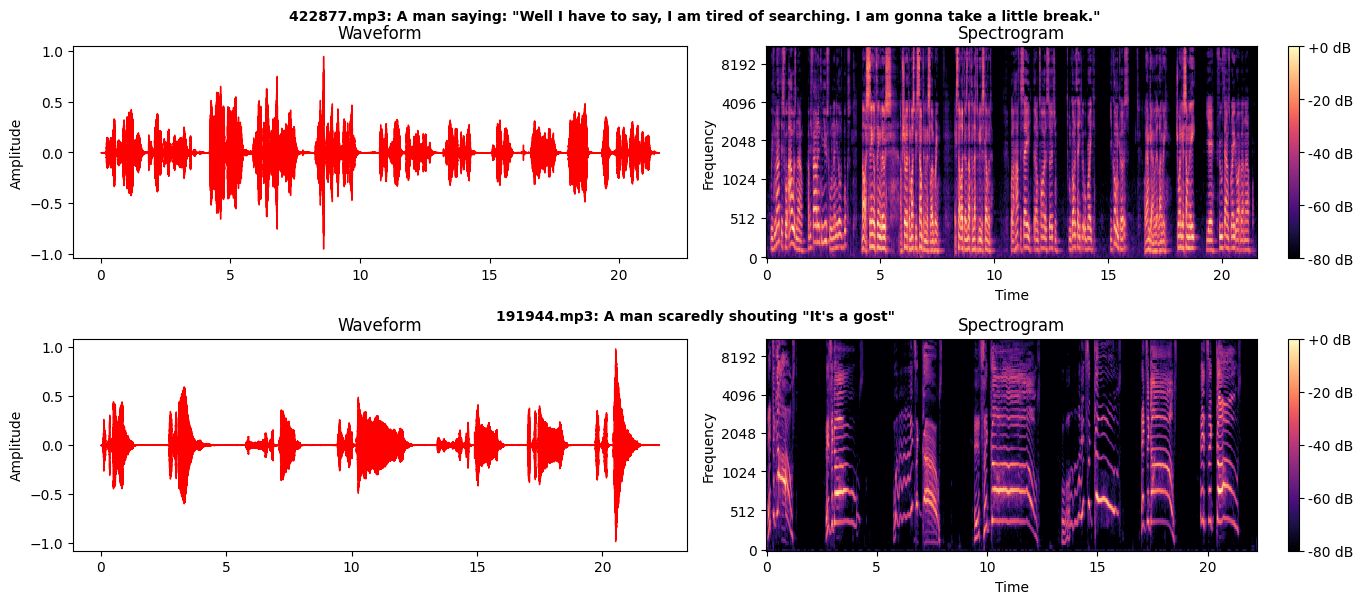

Cluster 1


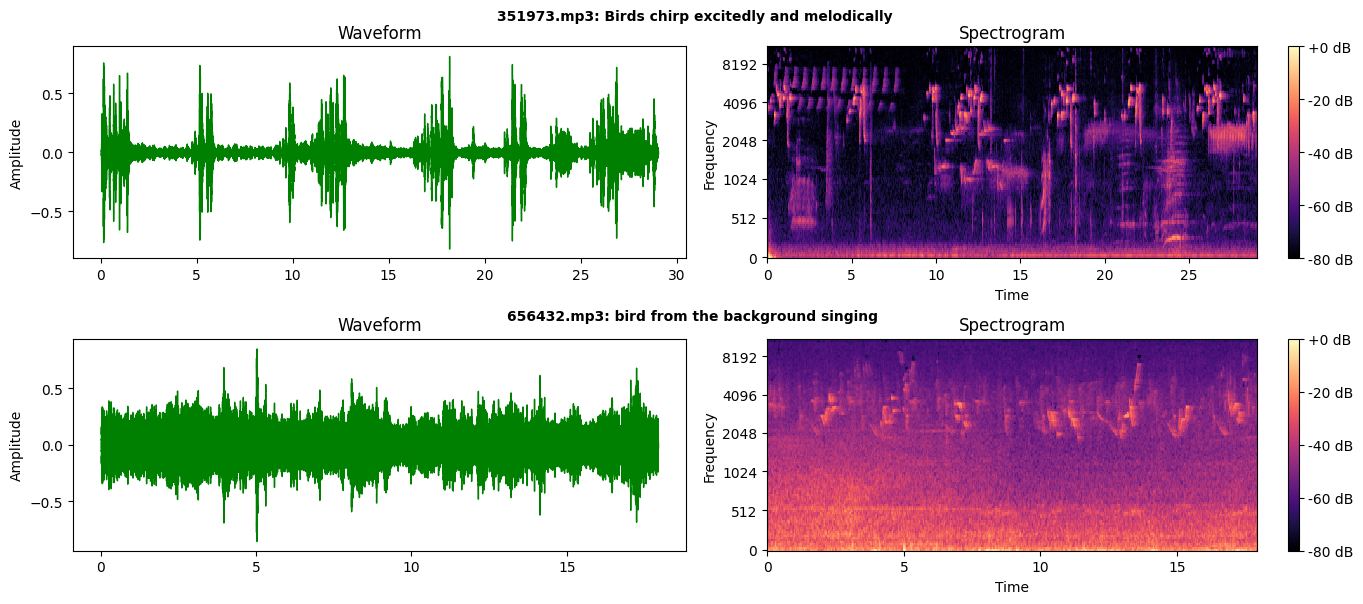

Cluster 2


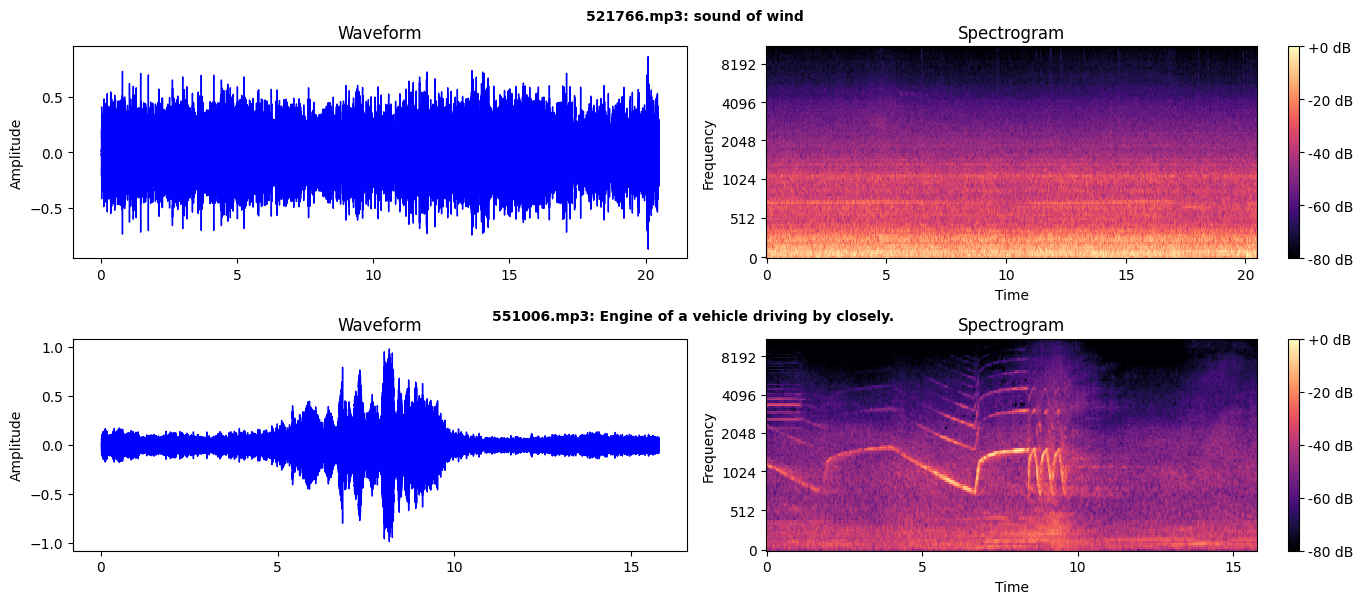

Cluster 3


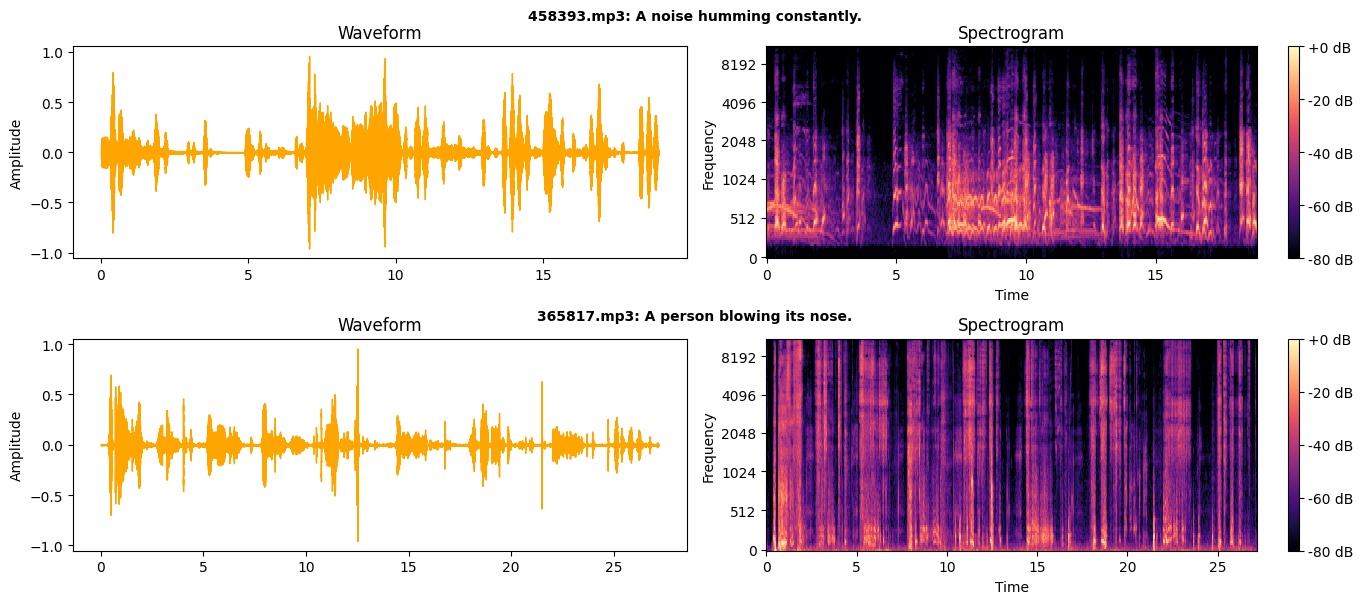

Cluster 4


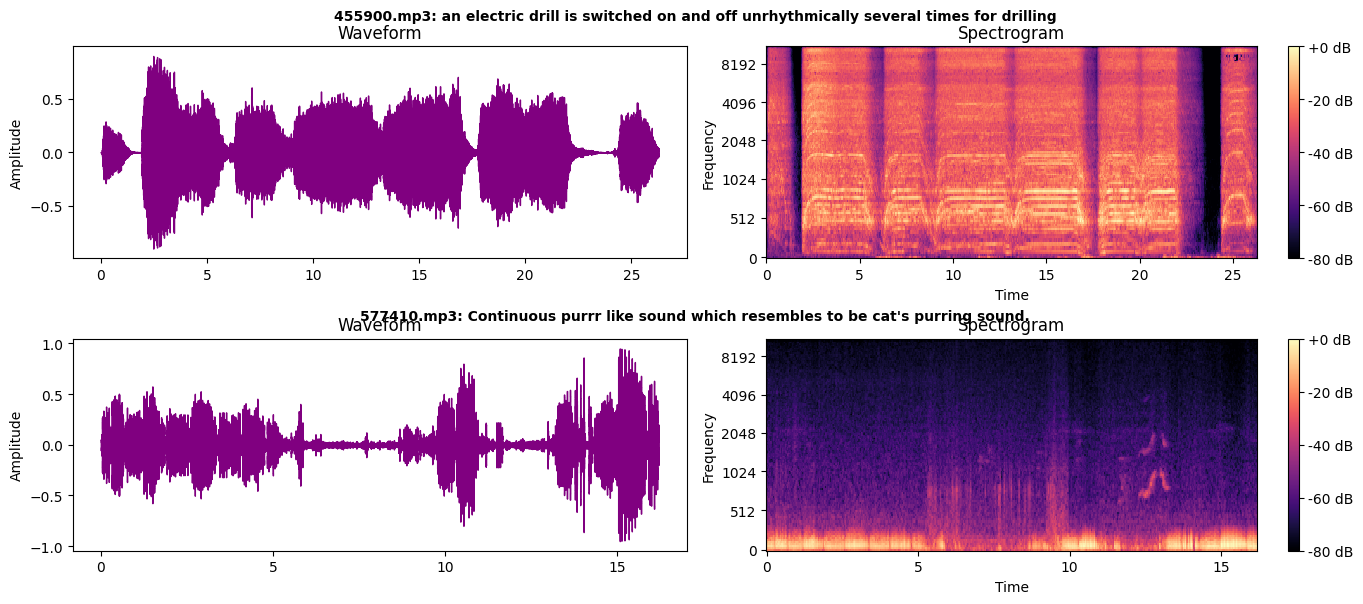

Cluster 5


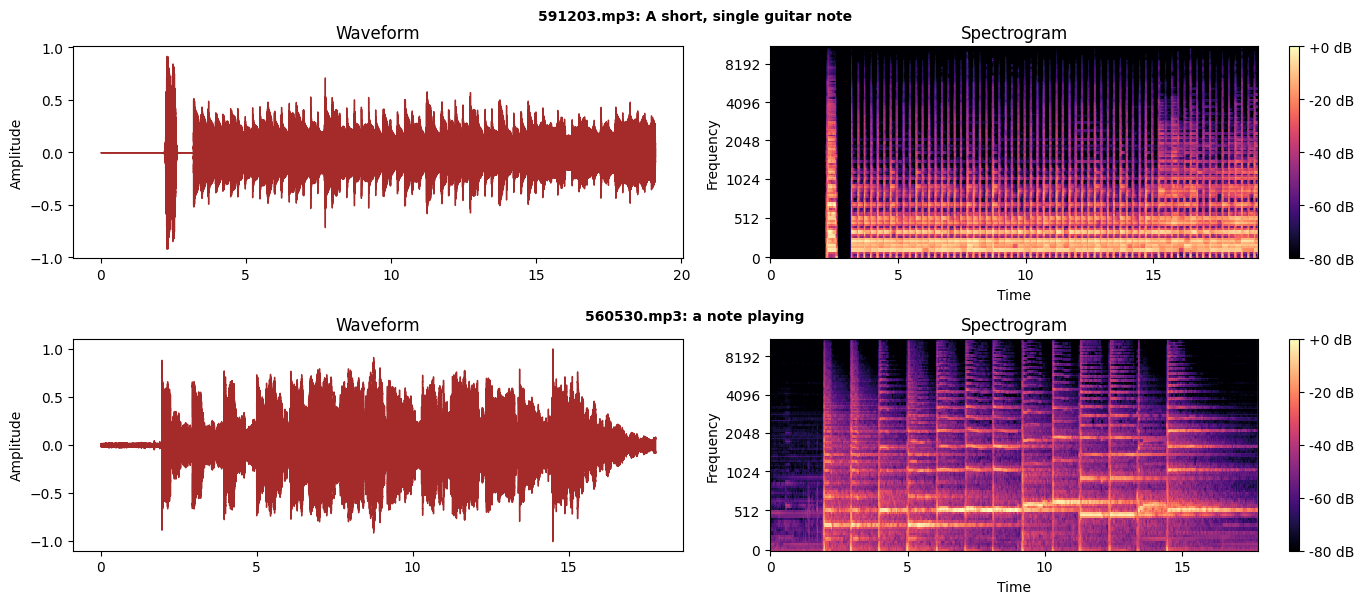

Cluster 6


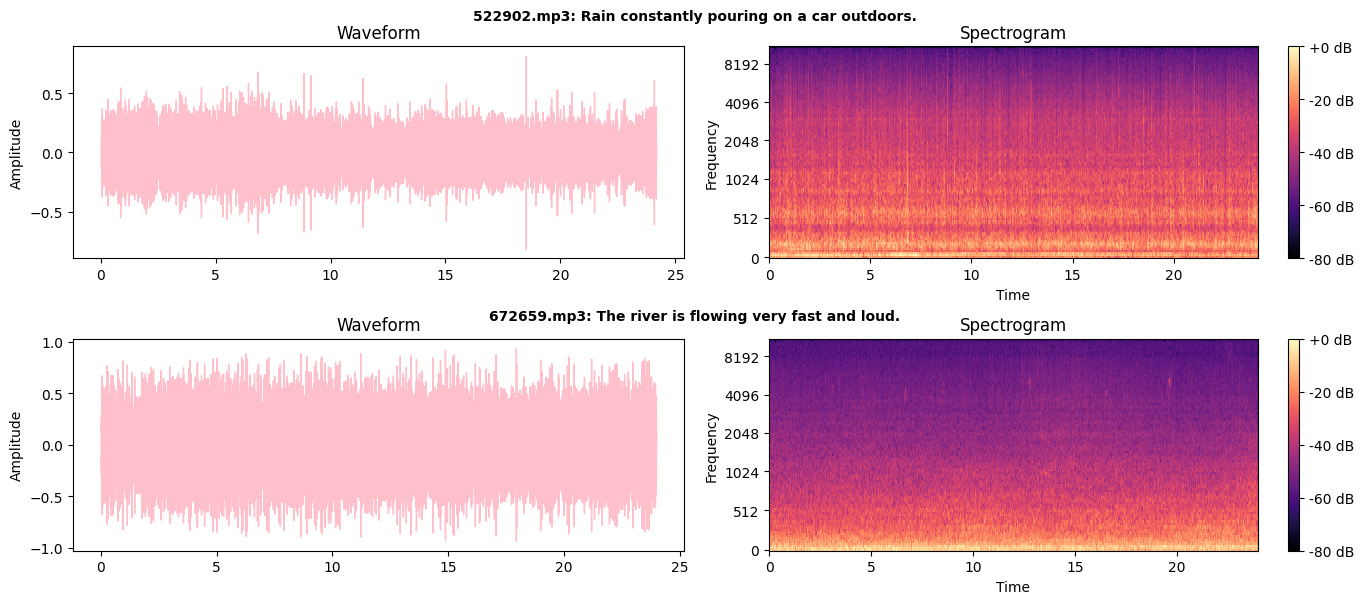

In [15]:
import librosa

plot_colors = ["red", "green", "blue", "orange", "purple", "brown", "pink", "gray", "olive", "cyan"]
n_files_to_show = 2
file_offset = 5 # index from where on in the cluster to take the files to show

for i in range(n_clusters):
    print(f"Cluster {i}")

    cluster_files = annotations_merged[annotations_merged["cluster"] == i]["filename"]
    fig, axes = plt.subplots(n_files_to_show, 2, figsize=(14, 3 * n_files_to_show))

    for j, file in enumerate(cluster_files[file_offset:n_files_to_show + file_offset].values):
        audio, sr = librosa.load(os.path.join("audio", file))
        ax_wave, ax_spec = axes[j] if n_files_to_show > 1 else axes

        # annoation as header
        annotation = annotations_merged[annotations_merged['filename'] == file]['text'].values[0]
        fig.text(0.5, 1 - j / n_files_to_show, f"{file}: {annotation}", ha="center", va="top", fontsize=10, fontweight="bold")

        # Plot waveform with cluster color
        librosa.display.waveshow(audio, sr=sr, ax=ax_wave, color=plot_colors[i % len(plot_colors)])
        ax_wave.set_title("Waveform")
        ax_wave.set_ylabel("Amplitude")
        ax_wave.set_xlabel("")

        # Compute and plot spectrogram
        S = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512)
        S_dB = librosa.power_to_db(S, ref=np.max)

        img = librosa.display.specshow(S_dB, sr=sr, hop_length=512, x_axis="time", y_axis="mel", ax=ax_spec)
        ax_spec.set_title("Spectrogram")
        ax_spec.set_xlabel("Time")
        ax_spec.set_ylabel("Frequency")
        fig.colorbar(img, ax=ax_spec, format="%+2.0f dB")

    plt.tight_layout()
    plt.savefig(f"cluster_{i}.png", dpi=300) # save the file
    plt.show()
